In [1]:
import os
os.chdir(os.path.expanduser("/home/dylanpare/HRO_PRS/DCF"))
from polBpy import dispersion, fitting, utils
import numpy as np
import matplotlib.pyplot as plt
import cmocean

In [2]:
from astropy.io import fits
from astropy.wcs import WCS
file = "/home/dylanpare/HRO_PRS/DCF/FIREPLACE/FIREPLACE_brick.fits"
data = fits.open(file)
wcs  = WCS(fits.open(file)[0].header)
print(data.info())

Filename: /home/dylanpare/HRO_PRS/DCF/FIREPLACE/FIREPLACE_brick.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  STOKES I      1 PrimaryHDU    1490   (79, 55)   float64   
  1  ERROR I       1 ImageHDU        19   (79, 55)   float64   
  2  STOKES Q      1 ImageHDU        19   (79, 55)   float64   
  3  ERROR Q       1 ImageHDU        19   (79, 55)   float64   
  4  STOKES U      1 ImageHDU        19   (79, 55)   float64   
  5  ERROR U       1 ImageHDU        19   (79, 55)   float64   
  6  IMAGE MASK    1 ImageHDU        60   (79, 55)   float64   
  7  PERCENT POL    1 ImageHDU        19   (79, 55)   float64   
  8  DEBIASED PERCENT POL    1 ImageHDU        19   (79, 55)   float64   
  9  ERROR PERCENT POL    1 ImageHDU        19   (79, 55)   float64   
 10  POL ANGLE     1 ImageHDU        19   (79, 55)   float64   
 11  ROTATED POL ANGLE    1 ImageHDU        19   (79, 55)   float64   
 12  ERROR POL ANGLE    1 ImageHDU        19   (79, 55)   float64   
 13  PO

(55, 79)
(55, 79)


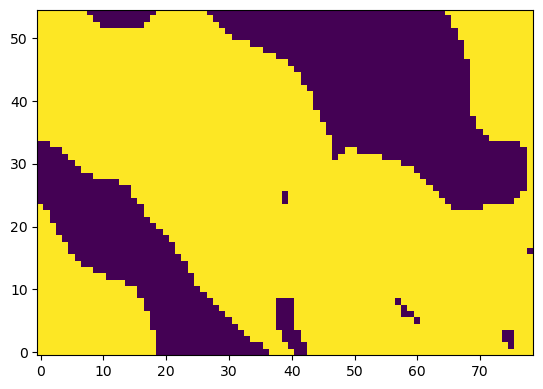

In [3]:
p_flux = data['DEBIASED POL FLUX'].data # 
stokes_I = data['STOKES I'].data #
err_I    = data['ERROR I'].data
p_flux_err = data['ERROR POL FLUX'].data #
pixel_size = data[0].header['CDELT2']*3600 #in arcsec
# Find the points
m = np.where((p_flux/p_flux_err > 3.0) & (stokes_I/err_I > 200.0))
# Create the mask
mask = np.full_like(p_flux,0.0)
mask[m] = 1.0
plt.imshow(mask,origin='lower')
print(mask.shape)
print(stokes_I.shape)

In [4]:
res = dispersion.autocorrelation(p_flux,p_flux_err,pixsize=pixel_size,mask=mask,plots=False,hwhm=True)

In [5]:
print("Delta' = %2.2f +/- %2.2f [arcmin]"%(res[0],res[1]))

Delta' = 1.03 +/- 0.12 [arcmin]


In [6]:
angles = data['ROTATED POL ANGLE'].data # km/s
angles_err = data['ERROR POL ANGLE'].data # km/s
beam_s = 4*pixel_size # FWHM value of the beam
win_s = 9 # pixel

In [ ]:
res1 = dispersion.dispersion_function_map(angles,angles_err,pixel_size,mask=mask,beam=beam_s,w=win_s,verb=False)

Analysis window size =  19 x 19
Skipping Pixel = 9 16
Skipping Pixel = 9 17
Skipping Pixel = 9 18
Skipping Pixel = 9 19
Skipping Pixel = 9 20
Skipping Pixel = 9 21
Skipping Pixel = 9 22
Skipping Pixel = 9 23
Skipping Pixel = 9 24
Skipping Pixel = 9 25
Skipping Pixel = 9 26


/home/dylanpare/mambaforge/envs/astronomy/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/dylanpare/mambaforge/envs/astronomy/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/dylanpare/mambaforge/envs/astronomy/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/dylanpare/HRO_PRS/DCF/polBpy/utils.py:95: RuntimeWarning: Mean of empty slice
  rms = np.sqrt(np.nanmean(vec**2))
/home/dylanpare/HRO_PRS/DCF/polBpy/dispersion.py:141: RuntimeWarning: invalid value encountered in sqrt
  errors_c[i]= np.sqrt( (sinDphisum[i]**2)*sigma2sum[i] + (sinDphisum[i]**2)*Dphisum[i] + \


Skipping Pixel = 10 16
Skipping Pixel = 10 17
Skipping Pixel = 10 18
Skipping Pixel = 10 19
Skipping Pixel = 10 20
Skipping Pixel = 10 21
Skipping Pixel = 10 22
Skipping Pixel = 10 23
Skipping Pixel = 10 24
Skipping Pixel = 10 25
Skipping Pixel = 11 14
Skipping Pixel = 11 15
Skipping Pixel = 11 16
Skipping Pixel = 11 17
Skipping Pixel = 11 18
Skipping Pixel = 11 19
Skipping Pixel = 11 20
Skipping Pixel = 11 21
Skipping Pixel = 11 22
Skipping Pixel = 11 23
Skipping Pixel = 11 24
Skipping Pixel = 12 11
Skipping Pixel = 12 12
Skipping Pixel = 12 13
Skipping Pixel = 12 14
Skipping Pixel = 12 15
Skipping Pixel = 12 16
Skipping Pixel = 12 17
Skipping Pixel = 12 18
Skipping Pixel = 12 19
Skipping Pixel = 12 20
Skipping Pixel = 12 21
Skipping Pixel = 12 22
Skipping Pixel = 12 23
Skipping Pixel = 12 24
Skipping Pixel = 13 9
Skipping Pixel = 13 10
Skipping Pixel = 13 11
Skipping Pixel = 13 12
Skipping Pixel = 13 13
Skipping Pixel = 13 14
Skipping Pixel = 13 15
Skipping Pixel = 13 16
Skipping Pix

In [ ]:
epix = (30,30)
lvec = res1[0][epix]/3600.
disp_f = res1[1][epix]
disp_f_err = res1[2][epix]
plt.errorbar(lvec,disp_f,yerr=disp_f_err,fmt='bo')
plt.xlabel(r'$\ell^{2}$ [arcmin$^{2}$]')
plt.ylabel(r'$1-\langle \cos(\Delta\phi)\rangle$')

In [9]:
m_lvec = res1[0][:] # in arcsec^2
m_disp_f = res1[1][:]
m_disp_f_err = res1[2][:]
res2 = fitting.mcmc_fit_map(m_disp_f,m_lvec,m_disp_f_err,win_s,pixel_size,beam=beam_s,a2=5.568E-2,delta=16.,f=100,num=200,
                            verb=False,n_cores=64)

(55, 79, 19)


In [10]:
l = np.arange(0,10000) # define some values of \ell^2 in arcsec for the model
# Choose the same pixel example
nepix = (30,30)
f = fitting.model_funct(l,res2['a'][nepix],res2['d'][nepix],(res2['f'][nepix]),beam=beam_s)

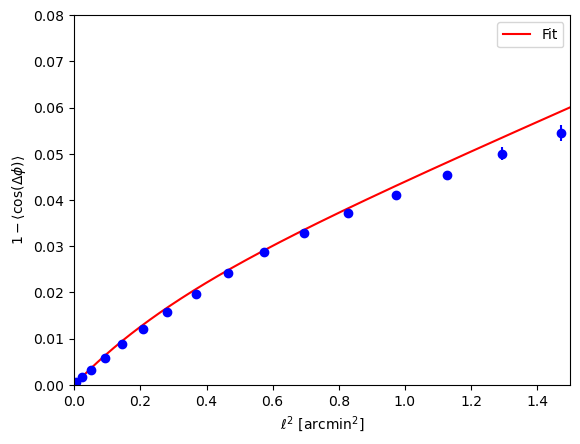

In [11]:
lvec = res1[0][epix]/3600.
disp_f = res1[1][epix]
disp_f_err = res1[2][epix]
plt.errorbar(lvec,disp_f,yerr=res2['chi'][10,10]*disp_f_err,fmt='bo')
plt.xlabel(r'$\ell^{2}$ [arcmin$^{2}$]')
plt.ylabel(r'$1-\langle \cos(\Delta\phi)\rangle$')
plt.plot(l/3600., f,c='red',label='Fit')
plt.ylim([0.,0.08])
plt.xlim([0.,1.5])
plt.legend()

In [12]:
a2 = res2['a'][nepix]*3600.*1000 # Units of 10^{-3} arcmin^{-2}
print("a_2 = %2.3E [arcmin^-2]"%a2)

a_2 = 3.142E+01 [arcmin^-2]


In [13]:
delta = res2['d'][nepix]
print("delta = %2.2f [arcsec]"%delta)

delta = 20.65 [arcsec]


In [14]:
Delta_p = res[0]*60.
ratio = Delta_p/res2['f'][nepix]
print("ratio = %2.2f"%ratio)

ratio = 0.02


Text(0.5, 1.0, '$ratio$')

<Figure size 2000x500 with 0 Axes>

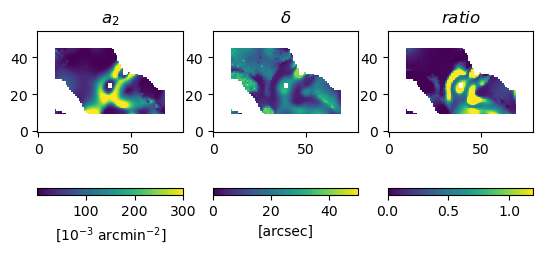

In [15]:
a2_map = res2['a']*3600*1000 # Units of 10^{-3} arcmin^{-2}
delta_map = res2['d'] # arcsec
ratio_map = Delta_p/res2['f']
plt.figure(figsize=(20,5))
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1)
g = ax1.imshow(a2_map,origin='lower',vmin=1.,vmax=300.)
plt.colorbar(g,ax=ax1,orientation='horizontal',label=r'[10$^{-3}$ arcmin$^{-2}$]')
ax1.set_title(r'$a_{2}$')
g = ax2.imshow(delta_map,origin='lower',vmin=0.,vmax=50.)
plt.colorbar(g,ax=ax2,orientation='horizontal', label='[arcsec]')
ax2.set_title(r'$\delta$')
g = ax3.imshow(ratio_map,origin='lower',vmin=0.,vmax=1.2)
plt.colorbar(g,ax=ax3,orientation='horizontal',label='')
ax3.set_title(r'$ratio$')

In [16]:
c_a2_map = utils.clean_map(a2_map,sigma=2)
c_delta_map = utils.clean_map(delta_map,sigma=2)
c_ratio_map = utils.clean_map(ratio_map,sigma=2)

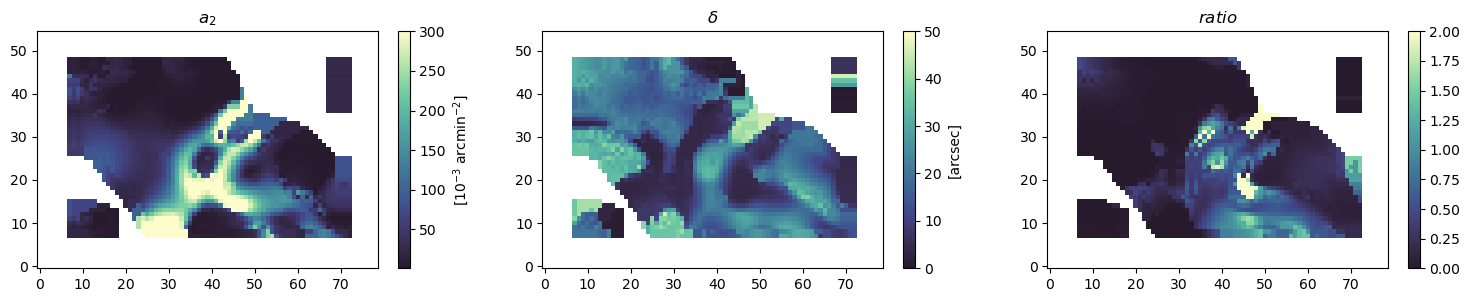

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3,nrows=1,figsize=(15,3))
cmap = cmocean.cm.deep_r
g = ax1.imshow(c_a2_map,origin='lower',vmin=1.,vmax=300.,cmap=cmap)
plt.colorbar(g,ax=ax1,orientation='vertical',label=r'[10$^{-3}$ arcmin$^{-2}$]',fraction=0.03)
ax1.set_title(r'$a_{2}$')
g = ax2.imshow(c_delta_map,origin='lower',vmin=0.,vmax=50.,cmap=cmap)
plt.colorbar(g,ax=ax2,orientation='vertical', label='[arcsec]',fraction=0.03)
ax2.set_title(r'$\delta$')
g = ax3.imshow(c_ratio_map,origin='lower',vmin=0.,vmax=2.0,cmap=cmap)
plt.colorbar(g,ax=ax3,orientation='vertical',label='',fraction=0.03)
ax3.set_title(r'$ratio$')
#fig.suptitle('Clean Maps')
plt.tight_layout()
plt.savefig('cleaned_mcmc_Brick.pdf',format='pdf')

In [18]:
# Write out data sets as FITS files
fits.writeto('Brick_a2.fits',data=c_a2_map,header=fits.open(file)[0].header,overwrite=True)
fits.writeto('Brick_delta.fits',data=c_delta_map,header=fits.open(file)[0].header,overwrite=True)
fits.writeto('Brick_ratio.fits',data=c_ratio_map,header=fits.open(file)[0].header,overwrite=True)